<h3 style="text-align: center;"><b>Convolution and pooling operations</b></h3>

### Convolution (свёртка)

<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width=450 height=400>

In [2]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt

In [3]:
! wget https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg

--2025-03-31 19:18:22--  https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.kotzendes-einhorn.de (www.kotzendes-einhorn.de)... failed: Name or service not known.
wget: unable to resolve host address ‘www.kotzendes-einhorn.de’


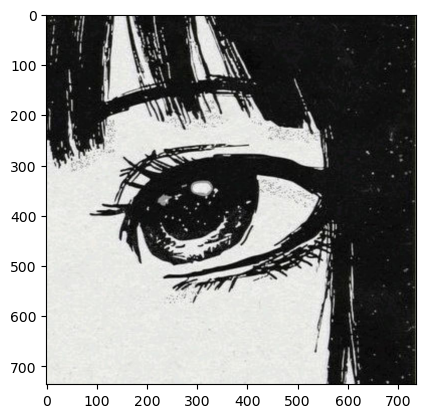

In [8]:
def checkByte(a):
    if a > 255:
        a = 255
    if a < 0:
        a = 0
    return a
  

def conv(a, b):
    sum = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            sum += a[i][j] * b[i][j]
    return sum
  

def median(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[ceil(len(c)/2)]
  

def max(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[len(c)-1]
  

def min(a):
    c = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            c.append(a[i][j])
    c.sort()
    return c[0]

im = Image.open('imgs/test.jpg')
pixels = im.load()

plt.imshow(im);

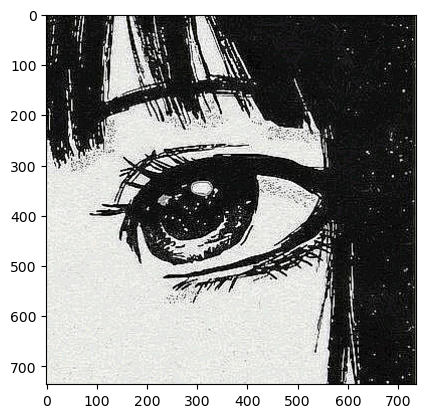

In [12]:
imFinal = im.copy()
pixels2 = imFinal.load()
# filter = [
#     [-1, -1, 0, 0, 0],
#     [0, -1, -1, -1, 0],
#     [0, -1, 9, -1, 0],
#     [0, -1, -1, -1, 0],
#     [0, 0, 0, 0, 0]
# ]

# filter = [
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, 4, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1]
# ]


# filter = [
#     [0, 0, 0, 1, 0, 0, 0],
#     [0, 0, 1, 1, 1, 0, 0],
#     [0, 1, 1, 1, 1, 1, 0],
#     [1, 1, 1, 1, 1, 1, 1],
#     [0, 1, 1, 1, 1, 1, 0],
#     [0, 0, 1, 1, 1, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0]
# ]



filter = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]


'''
filter = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]'''


div = 0
for i in range(len(filter)):
    for j in range(len(filter[0])):
        div += filter[i][j]
if div == 0:
    div = 1

for i in range(floor(len(filter)/2), im.width - floor(len(filter)/2)):
    for j in range(floor(len(filter)/2), im.height - floor(len(filter)/2)):
        matrR = []
        matrG = []
        matrB = []
        for n in range(-floor(len(filter)/2), ceil(len(filter)/2)):
            rowR = []
            rowG = []
            rowB = []
            for m in range(-floor(len(filter)/2), ceil(len(filter)/2)):
                r, g, b = pixels[i + n, j + m]
                rowR.append(r)
                rowG.append(g)
                rowB.append(b)
            matrR.append(rowR)
            matrG.append(rowG)
            matrB.append(rowB)

        r = checkByte(round(conv(matrR, filter) / div))
        g = checkByte(round(conv(matrG, filter) / div))
        b = checkByte(round(conv(matrB, filter) / div))

       # r = checkByte(min(matrR))
       # g = checkByte(min(matrG))
       # b = checkByte(min(matrB))
        '''
        if r < 512:
            pixels2[i, j] = (255, 255, 255)
        else:
            pixels2[i, j] = (0, 0, 0)'''
        pixels2[i, j] = (r, g, b)

plt.imshow(imFinal);